<a href="https://colab.research.google.com/github/zavideevaa/merges/blob/main/level_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
f = pd.read_csv("Custom Events Report_1674472141.089301.csv")
f.sort_values(['M3Lvl', 'Result', 'orders_progress', 'Events'], inplace=True)
f['Result'] = f['Result'].astype('str') 
f.query("M3Lvl == 1 and Result == 'won' and Users > 50")
# f['Result'].values

,App,Event,total_deletions,total_generators_taps,total_merge_count,orders_progress,M3Lvl,Result,Events,Users,Events Per Users
632,mycat,core_game_finished,0,5,8,1.00,1,won,61,59,1.03
984,mycat,core_game_finished,0,10,15,1.00,1,won,66,66,1.00
939,mycat,core_game_finished,0,5,9,1.00,1,won,74,72,1.03
817,mycat,core_game_finished,0,26,20,1.00,1,won,79,78,1.01
1185,mycat,core_game_finished,0,6,11,1.00,1,won,89,89,1.00
1253,mycat,core_game_finished,0,26,8,1.00,1,won,100,100,1.00
741,mycat,core_game_finished,0,4,8,1.00,1,won,109,109,1.00
834,mycat,core_game_finished,0,4,9,1.00,1,won,183,182,1.01
952,mycat,core_game_finished,0,26,30,1.00,1,won,254,253,1.00
1055,mycat,core_game_finished,0,3,8,1.00,1,won,411,411,1.00


Общий WinRate 1 level

In [42]:
total_events = f.query("M3Lvl == 1")['Users'].sum()
win_events = f.query("M3Lvl == 1 and Result == 'won'")['Users'].sum()
interrupted_events = f.query("M3Lvl == 1 and Result == 'interrupted'")['Users'].sum()
restart_events = f.query("M3Lvl == 1 and Result == 'restarted'")['Users'].sum()

print("Win", win_events/total_events)
print("Interrupted", interrupted_events/total_events)
print('Restart', restart_events/total_events)

Win 0.8056690500510725
Interrupted 0.1481103166496425
Restart 0.04622063329928498


Статистика прохождения всех уровней

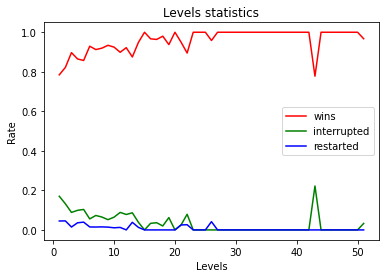

In [107]:
all_levels = list(set(f['M3Lvl'].values))
wins = []
interrupted = []
restarted = []

for i in all_levels:
  total_events = f.query("M3Lvl == {0}".format(i))['Events'].sum()
  win_events = f.query("M3Lvl == {0} and Result == 'won'".format(i))['Events'].sum()
  interrupted_events = f.query("M3Lvl == {0} and Result == 'interrupted'".format(i))['Events'].sum()
  restart_events = f.query("M3Lvl == {0} and Result == 'restarted'".format(i))['Events'].sum()
  # print(i)
  # print("Win", win_events/total_events, win_events)
  # print("Interrupted", interrupted_events/total_events, interrupted_events)
  # print('Restart', restart_events/total_events, restart_events)
  wins.append(win_events/total_events)
  interrupted.append(interrupted_events/total_events)
  restarted.append(restart_events/total_events)

plt.plot(all_levels, wins, color='r', label='wins')
plt.plot(all_levels, interrupted, color='g', label='interrupted')
plt.plot(all_levels, restarted, color='b', label='restarted')

plt.xlabel("Levels")
plt.ylabel("Rate")
plt.title("Levels statistics")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()


In [60]:
for i in range(len(wins)):
  if wins[i] < 0.9:
    print(all_levels[i])

1
2
3
4
5
11
13
22
43


Churn Rate

[7832, 2712, 1470, 975, 667, 463, 332, 257, 211, 184, 157, 124, 103, 78, 66, 60, 55, 50, 45, 38, 39, 38, 30, 25, 22, 22, 20, 17, 16, 14, 14, 12, 12, 11, 10, 10, 9, 9, 9, 9, 8, 7, 9, 7, 7, 7, 7, 6, 6, 6, 60]


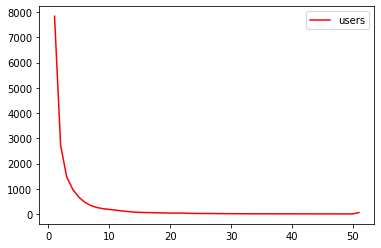

In [108]:
all_levels = list(set(f['M3Lvl'].values))
users = []
users_percentage = []

for i in range(len(all_levels)):
  total_events = f.query("M3Lvl == {0}".format(all_levels[i]))['Users'].sum()
  users.append(total_events)

for i in range(len(users)):
  user_percentage.append()
print(users)
plt.plot(all_levels, users, color='r', label='users')

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

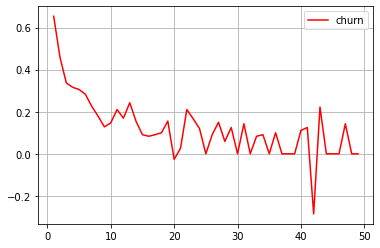

1 0.6537282941777324 7832
2 0.4579646017699115 2712
3 0.33673469387755106 1470
4 0.3158974358974359 975
5 0.3058470764617691 667
6 0.28293736501079914 463
7 0.22590361445783136 332
8 0.17898832684824906 257
9 0.12796208530805686 211
10 0.1467391304347826 184
11 0.21019108280254772 157
12 0.16935483870967738 124
13 0.24271844660194175 103
14 0.15384615384615385 78
19 0.15555555555555556 45
22 0.21052631578947367 38
23 0.16666666666666663 30
24 0.12 25
27 0.15000000000000002 20
29 0.125 16
31 0.1428571428571429 14
40 0.11111111111111116 9
41 0.125 8
43 0.2222222222222222 9
47 0.1428571428571429 7


In [111]:
churn = [1]
for i in range(1, len(all_levels)):
  churn.append(1 - users[i]/users[i-1])
churn.pop(0)
plt.plot(all_levels[:-2], churn [:-1], color='r', label='churn')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
plt.grid(True)
# To load the display window
plt.show()

for i in range(len(churn)):
  if churn[i] > 0.1:
    print(i+1, churn[i], users[i])
